<b>Project 01</b>

[Datasets(Train & Test), Colab Notebook and Pickle file](https://drive.google.com/drive/folders/1FYfp6Y6xwtPX0DM9QyQS5oU8PaLJX0sD?usp=sharing)  


## Importing Libraries

In [1]:
# Important libraries for Data Analysis purpose.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

## Training Dataset

In [2]:
# Creating a dataFrame for training data.

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Training Program ShapeAI/Final Submission/Project 01/Training Data.csv')

In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA - Exploratory Data Analysis

#### Exploration of data before cleaning and manipulation.(Training Dataset)

In [4]:
# First five datapoints from dataset
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Last five datapoints from dataset
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Any 10 datapoints from dataset
df_train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N
174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
271,LP001891,Male,Yes,0,Graduate,No,11146,0.0,136.0,360.0,1.0,Urban,Y
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y


In [7]:
# Shape of the dataset in form of (rows x columns)
df_train.shape

(614, 13)

In [8]:
# All columns in dataset
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# DataType of the columns
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# Basic information about the dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Conclusion:

* There are null values in columns 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History'.
* Some of the columns dtype is "object" so we have to change it "int" or "float" for further ML model preparation.

In [11]:
# Column-wise total Null values.
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# All Null values in dataset.
df_train.isnull().sum().sum()

149

In [13]:
# Basic statistical information about the dataset.
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
# Loan_ID is unique for every datapoint so it wouldn't be necessary for any prediction.
df_train.drop('Loan_ID', axis=1, inplace=True)

> Data Cleaning and Data Manipulation

1. Imputation of null values in columns 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History'.

2. As the columns 'Gender', 'Married', 'Dependents', and 'Self_Employed' are having the dtype as 'object', so for imputation of null values we have to use the mode().

3. As the columns 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History' are having the dtype as 'int or float', so for imputation of null values we have to use the mean() or the median().

4. As ML model takes only the numerical values as input, we have to change object dtype columns into a numerical(int, float) dtype.

5. To do the step 4 we can use replace function or we can use suitable encoding techniques.

eg. In 'Gender' column we can use replace function to change 'Male' to 0 and 'Female' to 1 and repectively we have to do specific changes in required columns. 

In [15]:
df_train.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


* Variable **'Gender'**

In [16]:
df_train.Gender.unique() # Unique classes present in Gender column

array(['Male', 'Female', nan], dtype=object)

In [17]:
df_train.Gender.fillna(df_train.Gender.mode()[0],inplace=True) # Imputation of null values using mode

In [18]:
df_train.Gender.value_counts() # Value counts of different classes in Gender column

Male      502
Female    112
Name: Gender, dtype: int64

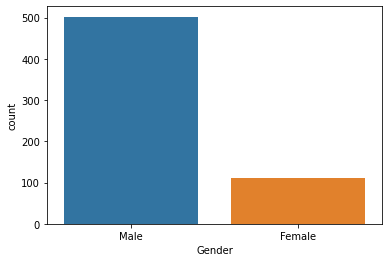

In [22]:
sns.countplot(df_train.Gender) # Distrubution of different classes in column

In [23]:
df_train.Gender.replace(['Male','Female'], [0,1],inplace=True) # Replacing the categorical values -> numerical values

In [24]:
df_train.Gender.value_counts()

0    502
1    112
Name: Gender, dtype: int64

* Variable **'Married'**

In [25]:
df_train.Married.unique() # Unique classes present in column

array(['No', 'Yes', nan], dtype=object)

In [26]:
df_train.Married.mode()[0] # Mode of the column Married

'Yes'

In [27]:
df_train.Married.fillna('Yes',inplace=True)  # Imputation of null values

In [28]:
df_train.Married.value_counts() # Value counts of different classes in Married column

Yes    401
No     213
Name: Married, dtype: int64

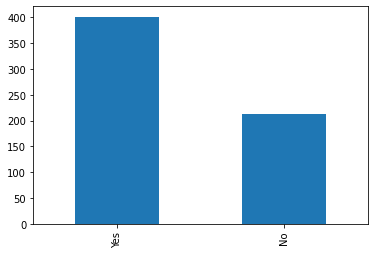

In [30]:
df_train.Married.value_counts().plot(kind='bar') # Distrubution of different classes

In [31]:
df_train.Married.replace(['Yes','No'], [1, 0], inplace=True) # Replacing the categorical values -> numerical values

In [32]:
df_train.Married.value_counts()

1    401
0    213
Name: Married, dtype: int64

* Variable **'Dependents'**

In [33]:
df_train.Dependents.unique() # Unique classes present in column

array(['0', '1', '2', '3+', nan], dtype=object)

In [34]:
df_train.Dependents.mode() # Mode of the variable Dependents

0    0
dtype: object

In [35]:
df_train.Dependents.fillna('0', inplace=True) # Imputation of null values

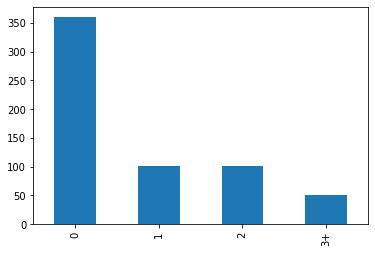

In [36]:
df_train.Dependents.value_counts().plot(kind='bar') # Distrubution of different classes

In [37]:
df_train.Dependents.replace(['0', '1', '2', '3+'], [0, 1, 2, 3], inplace=True) # Replacing the categorical values -> numerical values

In [38]:
df_train.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

* Variable **'Education'**

In [39]:
df_train.Education.unique() # Unique classes present in column

array(['Graduate', 'Not Graduate'], dtype=object)

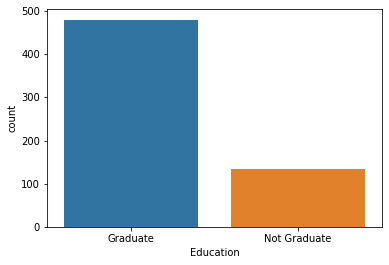

In [40]:
sns.countplot(df_train.Education) # Distrubution of different classes

In [ ]:
# Changing categorical values -> numerical values using Label Encoding Technique.

In [41]:
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder

In [42]:
le = LabelEncoder() # Creating Instance for LabelEncoder()

In [43]:
df_train.Education = le.fit_transform(df_train.Education) # Fitting and transforming the column Education using LabelEncoder instance.

In [44]:
df_train.Education.value_counts() # Value counts of different classes

0    480
1    134
Name: Education, dtype: int64

* Variable **'Self_Employed'**

In [45]:
df_train.Self_Employed.unique() # Unique classes present in column

array(['No', 'Yes', nan], dtype=object)

In [46]:
df_train.Self_Employed.fillna(df_train.Self_Employed.mode()[0], inplace=True) # Imputation of null values using mode.

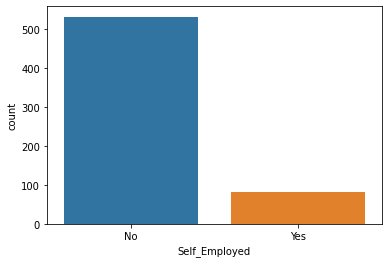

In [47]:
sns.countplot(df_train.Self_Employed) # Distrubution of different classes

In [48]:
df_train.Self_Employed = le.fit_transform(df_train.Self_Employed) # Fitting and transforming the column Self_Employed using LabelEncoder instance.

In [49]:
df_train.Self_Employed.value_counts() # Value counts of different classes

0    532
1     82
Name: Self_Employed, dtype: int64

* Variable **'LoanAmount'**

In [50]:
df_train.LoanAmount.isnull().sum() # Sum of total Null values

22

In [ ]:
print("Column Name: LoanAmount\n\nMean:", df_train.LoanAmount.mean(), "\nMedian:",df_train.LoanAmount.median())

Column Name: LoanAmount

Mean: 146.41216216216216 
Median: 128.0


In [51]:
df_train.LoanAmount.fillna(df_train.LoanAmount.median(), inplace=True) # Imputation of null values using median.

* Variable **'Loan_Amount_Term'**

In [52]:
df_train.Loan_Amount_Term.isnull().sum() # Sum of total Null values

14

In [53]:
df_train.Loan_Amount_Term.fillna(df_train.Loan_Amount_Term.median(), inplace=True) # Imputation of null values using median.

In [54]:
df_train.Loan_Amount_Term.value_counts() # Value counts of different classes

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

* Variable **'Credit_History'**

In [55]:
df_train.Credit_History.isnull().sum() # Sum of total Null values

50

In [56]:
df_train.Credit_History.unique() # Unique classes in column Credit_History

array([ 1.,  0., nan])

In [57]:
df_train.Credit_History.fillna(df_train.Credit_History.median(), inplace=True) # Imputation of null values using median.

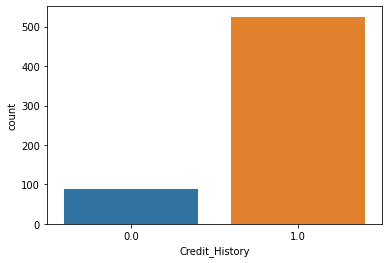

In [58]:
sns.countplot(df_train.Credit_History) # Distrubution of different classes

In [59]:
df_train.Credit_History.value_counts() # Value counts of different classes

1.0    525
0.0     89
Name: Credit_History, dtype: int64

* Variable **'Property_Area'**

In [60]:
df_train.Property_Area.value_counts() # Value counts of different classes

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

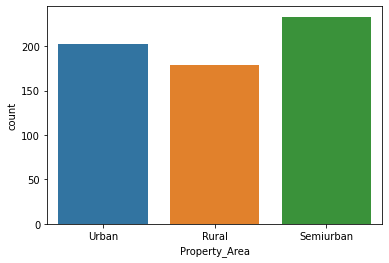

In [61]:
sns.countplot(df_train.Property_Area) # Distrubution of different classes

In [62]:
df_train.Property_Area = le.fit_transform(df_train.Property_Area) # Fitting and transforming the column Property_Area using LabelEncoder instance.

In [63]:
df_train.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

* Variable **'Loan_Status'**

In [64]:
df_train.Loan_Status.unique() # Unique classes in column

array(['Y', 'N'], dtype=object)

In [65]:
df_train.Loan_Status.value_counts() # Value counts of different classes

Y    422
N    192
Name: Loan_Status, dtype: int64

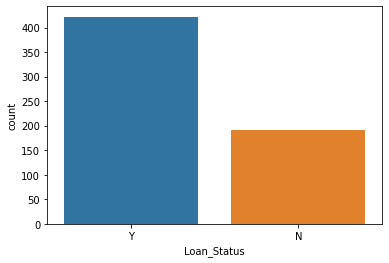

In [66]:
sns.countplot(df_train.Loan_Status) # Distrubution of different classes

In [67]:
df_train.Loan_Status = le.fit_transform(df_train.Loan_Status) # Fitting and transforming the column Loan_Status using LabelEncoder instance.

In [68]:
df_train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Data Exploration after cleaning and manipulation.(Training Dataset)

In [69]:
df_train.sample(10) # Any 10 datapoints from dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
242,0,0,0,0,0,2965,5701.0,155.0,60.0,1.0,2,1
317,0,1,0,0,0,2058,2134.0,88.0,360.0,1.0,2,1
256,0,0,0,1,0,6045,0.0,115.0,360.0,0.0,0,0
461,0,1,3,0,0,7740,0.0,128.0,180.0,1.0,2,1
407,1,0,0,1,0,2213,0.0,66.0,360.0,1.0,0,1
608,0,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
251,1,0,2,0,0,3427,0.0,138.0,360.0,1.0,2,0
166,1,1,0,0,0,4583,0.0,112.0,360.0,1.0,0,0
543,0,1,1,1,0,2239,2524.0,128.0,360.0,1.0,2,1
97,0,1,0,0,0,1977,997.0,50.0,360.0,1.0,1,1


In [70]:
df_train.info() # Basic information of dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


* Conclusion : 

1. There are no null value present in training dataset.
2. Data types of variables are in numerical format.


In [71]:
df_train.describe().T # # Basic statistical information of dataset.

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.182410,0.386497,0.0,0.00,0.0,0.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [72]:
df_train.corr('spearman') # Use of Spearman's correlation method to co-relate each variable with each other.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.168293,-0.045364,0.000525,-0.074391,-0.207607,-0.154456,0.086480,-0.009170,0.023914,-0.017987
Married,-0.364569,1.000000,0.352516,0.012304,0.004489,0.009276,0.269111,0.191520,-0.119930,0.010938,0.004155,0.091478
Dependents,-0.168293,0.352516,1.000000,0.048604,0.072552,0.140667,-0.037838,0.148768,-0.121601,-0.031723,0.021655,0.008982
Education,-0.045364,0.012304,0.048604,1.000000,-0.010383,-0.189536,-0.011973,-0.164354,-0.070937,-0.073658,-0.064534,-0.085884
Self_Employed,0.000525,0.004489,0.072552,-0.010383,1.000000,0.197866,-0.064544,0.111847,-0.041449,-0.001550,-0.030983,-0.003700
ApplicantIncome,-0.074391,0.009276,0.140667,-0.189536,0.197866,1.000000,-0.320056,0.502346,-0.040292,0.037180,-0.067188,-0.004162
CoapplicantIncome,-0.207607,0.269111,-0.037838,-0.011973,-0.064544,-0.320056,1.000000,0.235892,-0.012435,0.001271,-0.075993,0.034960
LoanAmount,-0.154456,0.191520,0.148768,-0.164354,0.111847,0.502346,0.235892,1.000000,0.037205,0.001932,-0.108059,-0.034176
Loan_Amount_Term,0.086480,-0.119930,-0.121601,-0.070937,-0.041449,-0.040292,-0.012435,0.037205,1.000000,0.007093,-0.061441,-0.027664
Credit_History,-0.009170,0.010938,-0.031723,-0.073658,-0.001550,0.037180,0.001271,0.001932,0.007093,1.000000,0.001360,0.540556


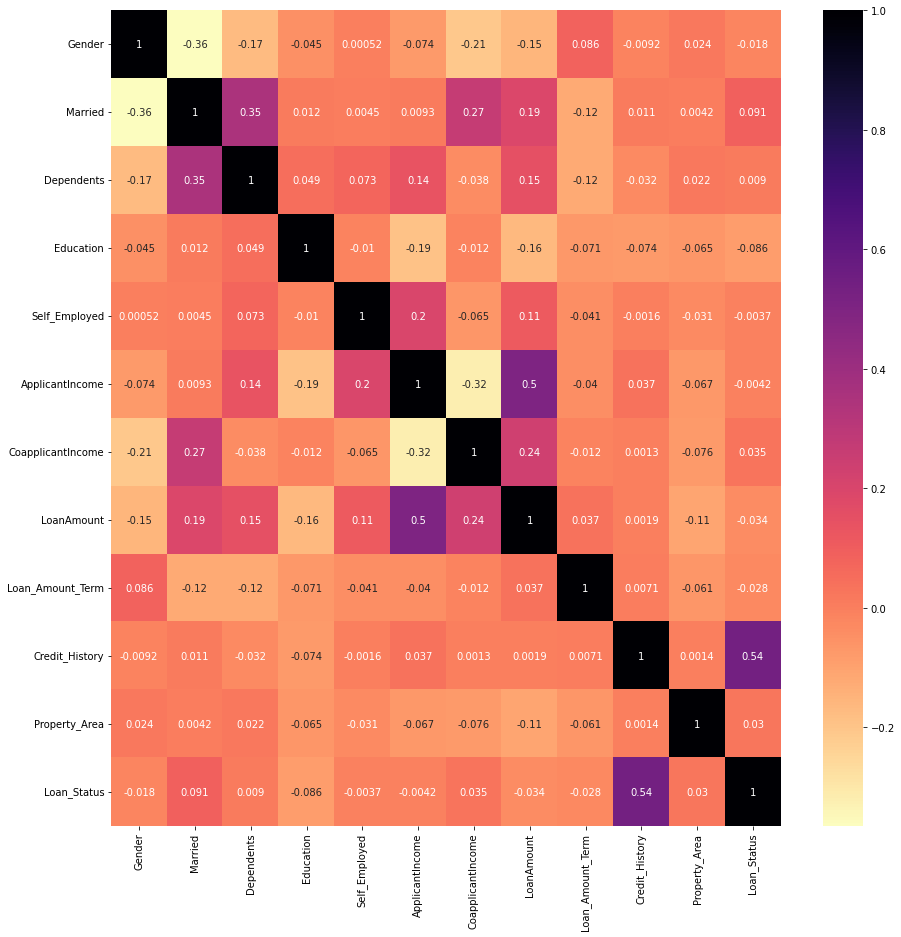

In [73]:
#  Graphical representation of data using colors to visualize the value of the matrix.
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr('spearman'), annot=True, cmap='magma_r')
plt.show()

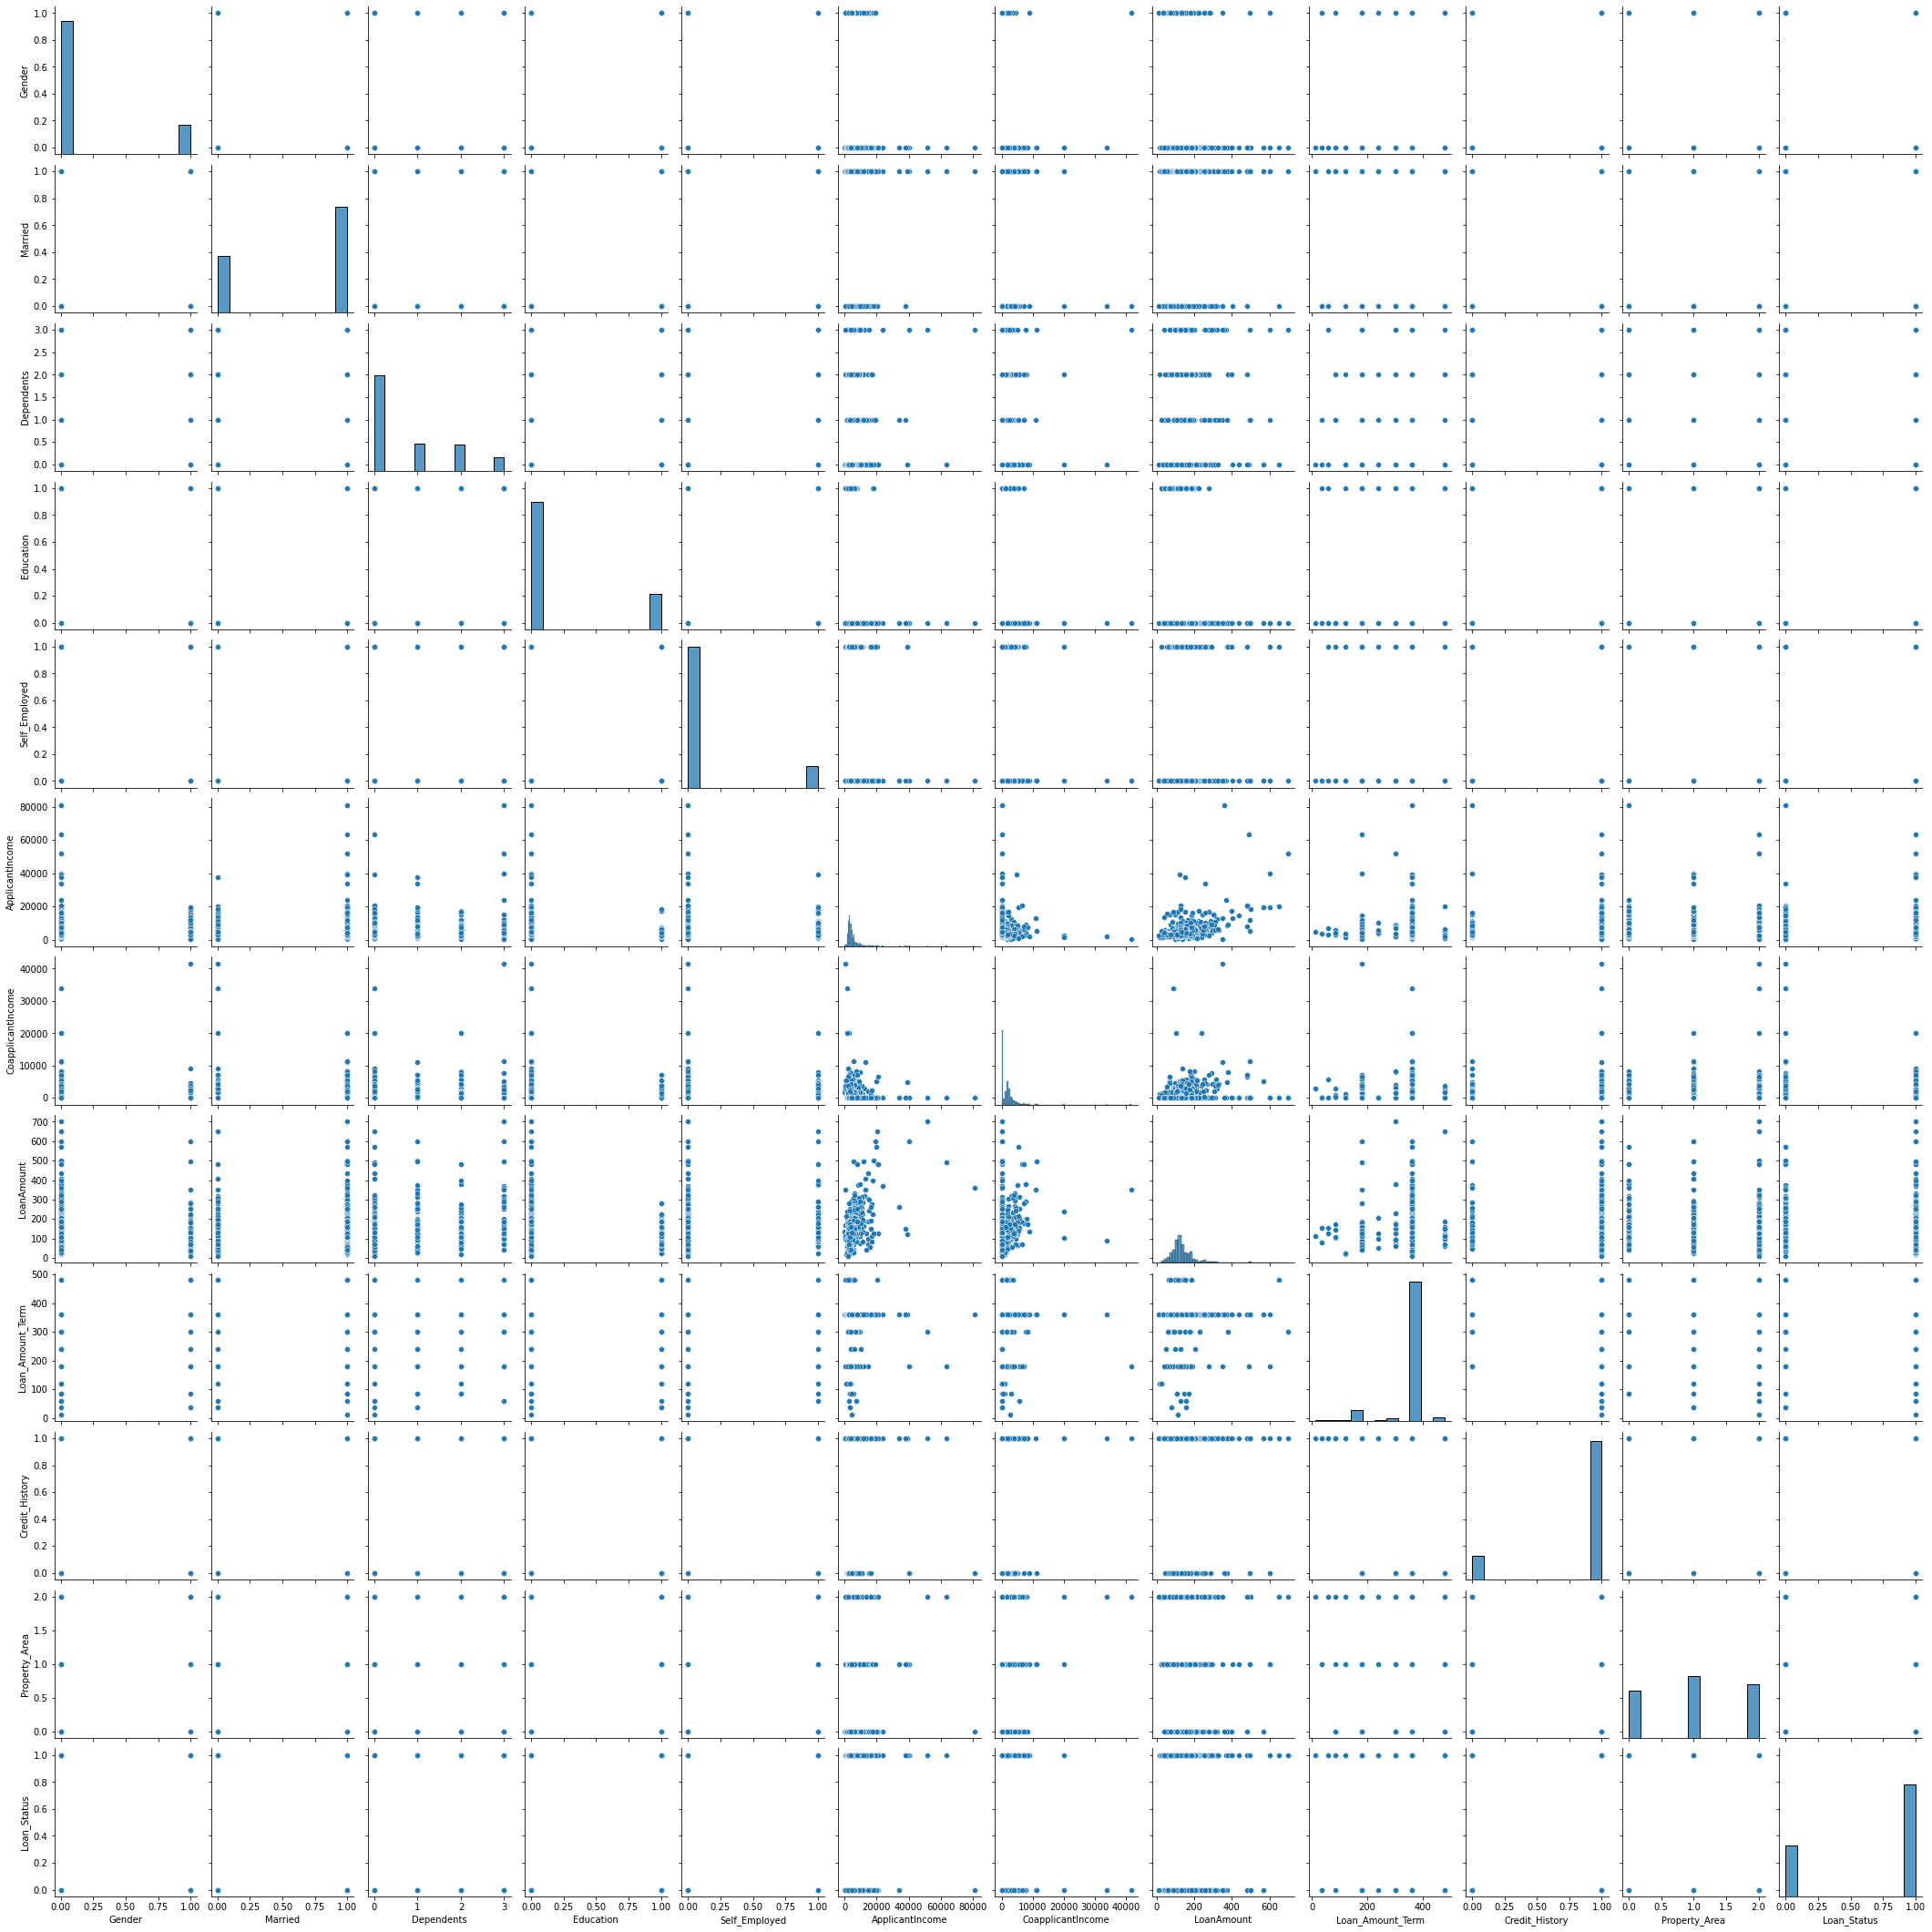

In [ ]:
# To plot multiple pairwise bivariate distributions in a dataset.
sns.pairplot(df_train)

#### Q.1 What's the ratio of Male to Female?

In [ ]:
print(df_train['Gender'].value_counts()[0],':', df_train['Gender'].value_counts()[1])

502 : 112


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


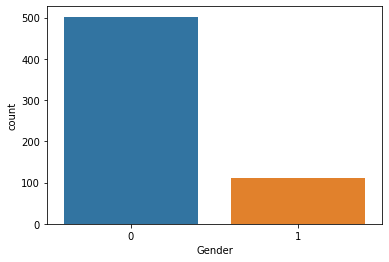

In [ ]:
sns.countplot(df_train['Gender'])

#### Q.2 How many Males are married and non-married?

In [ ]:
print("Married Males : ", (df_train.loc[df_train.Gender==0, ['Gender', 'Married']][df_train.Married==1]).shape[0], "\n")
print("Non-married Males : ", df_train.loc[df_train.Gender==0, ['Gender', 'Married']][df_train.Married==0].shape[0], "\n\n")

Married Males :  369 

Non-married Males :  133 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Q.3 How many Females are married and non-married?


In [ ]:
print("Married Females : ", (df_train.loc[df_train.Gender==1, ['Gender', 'Married']][df_train.Married==1]).shape[0], "\n")
print("Non-married Females : ", (df_train.loc[df_train.Gender==1, ['Gender', 'Married']][df_train.Married==0]).shape[0], "\n\n")

Married Females :  32 

Non-married Females :  80 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Q.4 How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [ ]:
newdf = df_train.loc[:,['Gender', 'Education', 'Married']]

In [ ]:
newdf.head()

,Gender,Education,Married
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,1
4,0,0,0


In [ ]:
gb = newdf.groupby(['Gender','Education'])

In [ ]:
gb.first()

Married
Gender Education         
0      0                0
       1                1
1      0                0
       1                1

In [ ]:
gb.Married.value_counts()

Gender  Education  Married
0       0          1          286
                   0          102
        1          1           83
                   0           31
1       0          0           66
                   1           26
        1          0           14
                   1            6
Name: Married, dtype: int64

In [ ]:
print(" Graduated Males (Married) :", gb.Married.value_counts()[0][0][1],
      "\n Graduated Males (Non-married) :", gb.Married.value_counts()[0][0][0],
      "\n\n Non-Graduated Males (Married) :", gb.Married.value_counts()[0][1][1],
      "\n Non-Graduated Males (Non-married)", gb.Married.value_counts()[0][1][0])

 Graduated Males (Married) : 286 
 Graduated Males (Non-married) : 102 

 Non-Graduated Males (Married) : 83 
 Non-Graduated Males (Non-married) 31


In [ ]:
print(" Graduated Females (Married) :", gb.Married.value_counts()[1][0][1],
      "\n Graduated Females (Non-married) :", gb.Married.value_counts()[1][0][0],
      "\n\n Non-Graduated Females (Married) :", gb.Married.value_counts()[1][1][1],
      "\n Non-Graduated Females (Non-married)", gb.Married.value_counts()[1][1][0])

 Graduated Females (Married) : 26 
 Graduated Females (Non-married) : 66 

 Non-Graduated Females (Married) : 6 
 Non-Graduated Females (Non-married) 14


#### Q.5 Which type of encoding will be required to perform on the "Education" column?

Ans : Label Encoding is performed in 'Education' column. 

#### Q.6 Is it a male or a female whose loan amount is the highest?


In [ ]:
df_train.LoanAmount.max()

700.0

In [ ]:
df_train.loc[df_train.LoanAmount == df_train.LoanAmount.max(),['Gender','LoanAmount']]

,Gender,LoanAmount
171,0,700.0


Ans : It is a **Male** whose loan amount is the highest.

#### Q.7 The specification and information about the applicant who has the highest income?

In [ ]:
df_train.ApplicantIncome.max()

81000

In [ ]:
df_train[df_train.ApplicantIncome == df_train.ApplicantIncome.max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,0,1,3,0,0,81000,0.0,360.0,360.0,0.0,0,0


Ans: It is a Male who is married and he is Graduated and Self_Employed with Income - 81000 

## Testing Dataset

In [74]:
# Defining the dataset for the testing data.

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Training Program ShapeAI/Final Submission/Project 01/Testing Data.csv')

> Exploratory Data Analysis

* Exploration
* Cleaning
* Manipulation 
* Visualization

In [75]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [77]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

* There are null values in columns 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History'.
* Some of the columns dtype is "object" so we have to change it "int" or "float" for further ML model preparation.

#### Cleaning of Testing Dataset

In [78]:
df_test.drop('Loan_ID', 1,inplace=True)

In [79]:
df_test.Gender.fillna(df_test.Gender.mode()[0], inplace=True)

In [80]:
df_test.Gender.replace(['Male','Female'],[0,1],inplace=True)

In [81]:
df_test.Gender.value_counts()

0    297
1     70
Name: Gender, dtype: int64

In [82]:
df_test.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [83]:
df_test.Married.replace(['Yes','No'],[1, 0],inplace=True)

In [84]:
df_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [85]:
df_test['Dependents'].fillna(str(df_test['Dependents'].mode()[0]), inplace=True)

In [86]:
df_test.Dependents.replace(["0","1","2","3+"],[0, 1, 2, 3],inplace=True)

In [87]:
df_test.Dependents.value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [88]:
df_test.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [89]:
df_test.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [90]:
df_test.Education.replace(df_test.Education.unique(),[0,1],inplace=True)

In [91]:
df_test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [92]:
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

In [93]:
df_test.Self_Employed.replace(['Yes','No'],[1, 0],inplace=True)

In [94]:
df_test.Self_Employed.value_counts()

0    330
1     37
Name: Self_Employed, dtype: int64

In [95]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True)

In [96]:
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=True)

In [97]:
df_test["Credit_History"].fillna(df_test["Credit_History"].median(), inplace=True)

In [98]:
df_test.Property_Area.unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [99]:
df_test.Property_Area.replace(df_test.Property_Area.unique(),[2, 1 , 0],inplace=True)

In [100]:
df_test.Property_Area.value_counts()

2    140
1    116
0    111
Name: Property_Area, dtype: int64

In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [102]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,0,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,0,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,0,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,0,0,0,1,0,3276,0,78.0,360.0,1.0,2


* Conclusion :

1. There are no null value present in testing dataset.
2. Data types of variables are in numerical format.

# Machine Learning

#### Importing Libraries for ML

In [103]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Selecting the features (X): All other variables and the target (y):Loan_Status from training data

In [104]:
X = df_train.drop('Loan_Status',axis=1) 

y = df_train.Loan_Status

#### Feature Selection(Feature Importance)

In [105]:
etc = ExtraTreesClassifier()

In [106]:
etc.fit(X, y)

ExtraTreesClassifier()

* Top 10 features w.r.t. the Target

In [107]:
imp_features = pd.Series(etc.feature_importances_,index=X.columns)

In [108]:
imp_features.nlargest(10)

Credit_History       0.280735
ApplicantIncome      0.184197
LoanAmount           0.178699
CoapplicantIncome    0.119962
Dependents           0.060094
Property_Area        0.051086
Loan_Amount_Term     0.046658
Self_Employed        0.021264
Gender               0.019779
Education            0.019749
dtype: float64

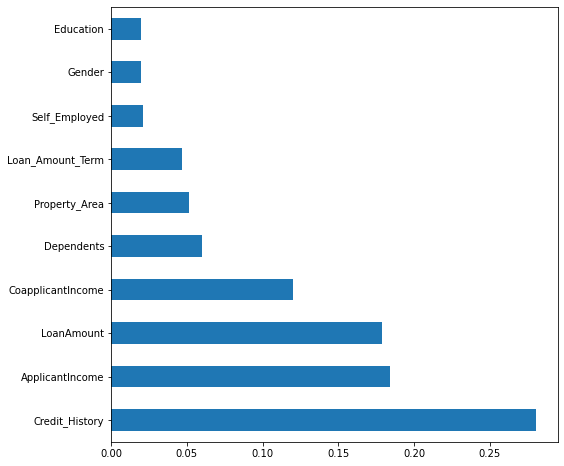

In [109]:
plt.figure(figsize=(8, 8))
imp_features.nlargest(10).plot(kind='barh')

In [110]:
new_X = df_train[list(imp_features.nlargest(10).index)]

In [111]:
new_X.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Loan_Amount_Term,Self_Employed,Gender,Education
0,1.0,5849,128.0,0.0,0,2,360.0,0,0,0
1,1.0,4583,128.0,1508.0,1,0,360.0,0,0,0
2,1.0,3000,66.0,0.0,0,2,360.0,1,0,0
3,1.0,2583,120.0,2358.0,0,2,360.0,0,0,1
4,1.0,6000,141.0,0.0,0,2,360.0,0,0,0


In [112]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#### Choosing an appropriate model

> The problem we have is of a classification i.e.**Binary Classification**

> So we can use **`Logistic Regression Model`** or **`Decision Tree Classification Model`** or **`Random Forest Classification Model`**

In [113]:
lr_model = LogisticRegression()
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()

#### Splitting the Training data into Train and Test sets.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.30, random_state=42)

#### Model Training/Fitting -> Prediction -> Performance Testing

**`Logistics Regression Model`**



In [115]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [116]:
lr_y_pred = lr_model.predict(X_test)

lr_accuracy = (100 * accuracy_score(y_test, lr_y_pred)).round(2)
print(f"Accuracy of Logistic Regression Model : {lr_accuracy} %\n")
print('Confusion Matrix : \n', confusion_matrix(y_test, lr_y_pred),'\n')
print("Classification Report : \n",classification_report(y_test, lr_y_pred))

Accuracy of Logistic Regression Model : 78.38 %

Confusion Matrix : 
 [[ 27  38]
 [  2 118]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



**`Decision Tree Classifier`**

In [117]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
dtc_y_pred = dtc_model.predict(X_test)

dtc_accuracy = (100 * accuracy_score(y_test, dtc_y_pred)).round(2)
print(f"Accuracy of Decision Tree Classifier model : {dtc_accuracy} %\n")
print('Confusion Matrix : \n', confusion_matrix(y_test, dtc_y_pred),'\n')
print("Classification Report : \n",classification_report(y_test, dtc_y_pred))

Accuracy of Decision Tree Classifier model : 68.11 %

Confusion Matrix : 
 [[32 33]
 [26 94]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.49      0.52        65
           1       0.74      0.78      0.76       120

    accuracy                           0.68       185
   macro avg       0.65      0.64      0.64       185
weighted avg       0.67      0.68      0.68       185



**`Random Forest Classifier`**

In [119]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
rfc_y_pred = rfc_model.predict(X_test)

rfc_accuracy = (100 *accuracy_score(y_test, rfc_y_pred)).round(2)
print(f"Accuracy of Random Forest Classifier model : {rfc_accuracy} %\n")
print('Confusion Matrix : \n', confusion_matrix(y_test, rfc_y_pred),'\n')
print("Classification Report : \n",classification_report(y_test, rfc_y_pred))

Accuracy of Random Forest Classifier model : 77.84 %

Confusion Matrix : 
 [[ 32  33]
 [  8 112]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.49      0.61        65
           1       0.77      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.78      0.78      0.76       185



## Summary of ML model before Hyperparameter Tuning.

In [121]:
Model = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
Accuracy = [lr_accuracy, dtc_accuracy, rfc_accuracy]

In [122]:
acc_df = pd.DataFrame({'Model' : Model, 'Accuracy' : Accuracy})

In [123]:
acc_df.sort_values(by='Accuracy',ascending=False,ignore_index=True)

,Model,Accuracy
0,LogisticRegression,78.38
1,RandomForestClassifier,77.84
2,DecisionTreeClassifier,68.11


Conclusion : As we can see Logistic Regression Model gives us a highest accuracy.

## Hyper-parameter Tuning using RandomizedSearchCv

* Performing the Hyper-parameter Tuning to get the best parameteric value for the Random Forest Classifier Model(rfc_model) using RandomizedSearchCv

In [124]:
#  No. of trees in forest
n_estimators = [int(i) for i in range(100,1001,100)]

# No. of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in a tree
max_depth = [i for i in np.linspace(start=5, stop=30, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5, 10]

In [125]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [126]:
random_grid

{'max_depth': [5.0, 10.0, 15.0, 20.0, 25.0, 30.0],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 5, 10],
 'min_samples_split': [2, 5, 7, 10, 20],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [127]:
random_s_cv = RandomizedSearchCV(estimator=rfc_model,
                               param_distributions=random_grid,
                               scoring = 'neg_mean_squared_error',
                               n_jobs = 1,
                               random_state = 0,
                               verbose=2,
                               cv=5)

In [128]:
random_s_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=3, min_samples

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5.0, 10.0, 15.0, 20.0,
                                                      25.0, 30.0],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 7, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [129]:
random_s_cv.best_params_

{'max_depth': 30.0,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 300}

In [130]:
y_pred = random_s_cv.predict(X_test)

rf_accuracy = (100 *accuracy_score(y_test, y_pred)).round(2)
print(f"Accuracy of Random Forest Classifier Model after Hyper-parameter tuning : {rf_accuracy} %\n")
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred),'\n')
print("Classification Report : \n",classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier Model after Hyper-parameter tuning : 78.38 %

Confusion Matrix : 
 [[ 27  38]
 [  2 118]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



Conclusion : After Hyper-parameter tuning the Accuracy of Random Forest Classifier Model changes from **77.84 %** to **78.38 %** .

## Predicting the Loan_Status for Testing Data 

In [ ]:
# As in training features we have selected top 10 features w.r.t target.(which excludes the 'Married' column from the training dataset)
# Therefore, for prediction of Loan_status for testing data we have to take only 10 features which are included in training purpose.
df_test.drop('Married', 1, inplace=True)

In [136]:
df_test.head()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,5720,0,110.0,360.0,1.0,2
1,0,1,0,0,3076,1500,126.0,360.0,1.0,2
2,0,2,0,0,5000,1800,208.0,360.0,1.0,2
3,0,2,0,0,2340,2546,100.0,360.0,1.0,2
4,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [138]:
df_test_pred = random_s_cv.predict(df_test) # predicting the Loan_Status class for the df_test features.

In [139]:
df_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [140]:
final_predicted_df = df_test.copy() # copy of the df_test

In [141]:
final_predicted_df

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,5720,0,110.0,360.0,1.0,2
1,0,1,0,0,3076,1500,126.0,360.0,1.0,2
2,0,2,0,0,5000,1800,208.0,360.0,1.0,2
3,0,2,0,0,2340,2546,100.0,360.0,1.0,2
4,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,0,3,1,1,4009,1777,113.0,360.0,1.0,2
363,0,0,0,0,4158,709,115.0,360.0,1.0,2
364,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,0,0,0,0,5000,2393,158.0,360.0,1.0,0


In [142]:
final_predicted_df['Loan_Status'] = df_test_pred # Adding the target variable at the end of test dataset and it contains the predicted values

In [143]:
final_predicted_df

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5720,0,110.0,360.0,1.0,2,0
1,0,1,0,0,3076,1500,126.0,360.0,1.0,2,0
2,0,2,0,0,5000,1800,208.0,360.0,1.0,2,0
3,0,2,0,0,2340,2546,100.0,360.0,1.0,2,0
4,0,0,1,0,3276,0,78.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,3,1,1,4009,1777,113.0,360.0,1.0,2,0
363,0,0,0,0,4158,709,115.0,360.0,1.0,2,0
364,0,0,0,0,3250,1993,126.0,360.0,1.0,1,0
365,0,0,0,0,5000,2393,158.0,360.0,1.0,0,0


⬛ Conclusion : The above dataFrame contains the loan status column whose values are predicted using the **RandomForestClassifier** Model.

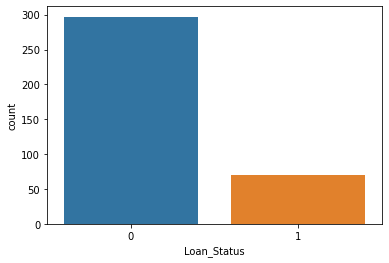

In [144]:
sns.countplot(final_predicted_df['Loan_Status'])

In [145]:
final_predicted_df['Loan_Status'].value_counts()

0    297
1     70
Name: Loan_Status, dtype: int64

Our model predicts **297 : 'Yes'** responses for the Loan_Status and **70 :   'No'** responses for the Loan_Status

## Pickling or Dumping of Model

In [146]:
import pickle

In [148]:
pickle.dump(random_s_cv, open('RFC_model.pkl', 'wb'))

Conclusion : Pickling the hyper-parametrized Random forest Classifier Model for further deployment process.